## Stocks Analysis with Pandas and Scikit-Learn

To start learning and analyzing stocks, 
1. we will start off by taking a quick look at the historical stocks prices. This will be done by extracting latest stocks data from pandas web-data reader and Yahoo Finance. 
2. Then we will try to view the data through exploratory analysis such as correlation heatmap, matplotlib visualization, and prediction analysis using Linear Analysis and K Nearest Neighbor (KNN).

## Loading Finance Dataset
Pandas web data reader is an extension of pandas library to communicate with most updated financial data. This will include sources as: Yahoo Finance, Google Finance, Enigma, etc.
We will extract Apple Stocks Price using the following codes:

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2019, 9, 1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,206.490005
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,204.160004
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005


 For the rest of analysis, we will use the Closing Price which remarks the final price in which the stocks are traded by the end of the day.

## Exploring Rolling Mean and Return Rate of Stocks
In this analysis, we analyse stocks using two key measurements: Rolling Mean and Return Rate.

## Rolling Mean (Moving Average) — to determine trend
Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. .

Let’s start code out the Rolling Mean:

In [2]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2019-08-19    197.160846
2019-08-20    197.391602
2019-08-21    197.632951
2019-08-22    197.859698
2019-08-23    197.960657
2019-08-26    198.086917
2019-08-27    198.186503
2019-08-28    198.286788
2019-08-29    198.391109
2019-08-30    198.498685
Name: Adj Close, dtype: float64

This will calculate the Moving Average for the last 100 windows (100 days) of stocks closing price and take the average for each of the window’s moving average. As you could see, The Moving Average steadily rises over the window and does not follow the jagged line of stocks price chart.

For better understanding, let’s plot it out with Matplotlib. We will overlay the Moving Average with our Stocks Price Chart.

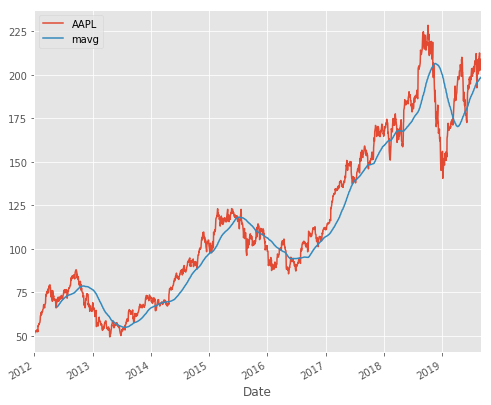

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.

In this chart, the Moving Average showcases increasing trend the upturn or downturn of stocks price. 

Logically, you should buy when the stocks are experiencing downturn and sell when the stocks are experiencing upturn

## Return Deviation — to determine risk and return
Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
Following is the formula you could refer to:

Formula for Returns

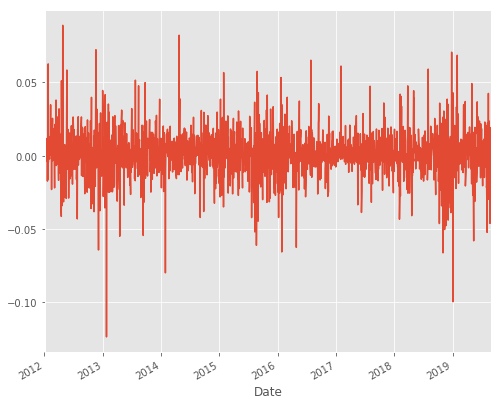

In [4]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

Logically, our ideal stocks should return as high and stable as possible. If you are risk averse(like me), you might want to avoid this stocks as you saw the 10% drop in 2013 and 2019 starting. This decision is heavily subjected to your general sentiment of the stocks and competitor analysis.

## Analysing Competitors Stocks
In this segment, we are going to analyse on how one company performs in relative with its competitor. Let’s assume we are interested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [5]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-08-26,206.490005,8.05,1168.890015,129.990005,135.449997
2019-08-27,204.160004,7.93,1167.839966,131.169998,135.740005
2019-08-28,205.529999,7.94,1171.020020,132.759995,135.559998
2019-08-29,209.009995,8.11,1192.849976,134.880005,138.119995
2019-08-30,208.740005,8.25,1188.099976,135.529999,137.860001


## Correlation Analysis — Does one competitor affect others?

We can analyse the competition by running the percentage change and correlation function in pandas.Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

Symbols      AAPL        GE      GOOG       IBM      MSFT
Symbols                                                  
AAPL     1.000000  0.256428  0.417391  0.331268  0.427708
GE       0.256428  1.000000  0.277707  0.376364  0.285353
GOOG     0.417391  0.277707  1.000000  0.366209  0.530406
IBM      0.331268  0.376364  0.366209  1.000000  0.444646
MSFT     0.427708  0.285353  0.530406  0.444646  1.000000


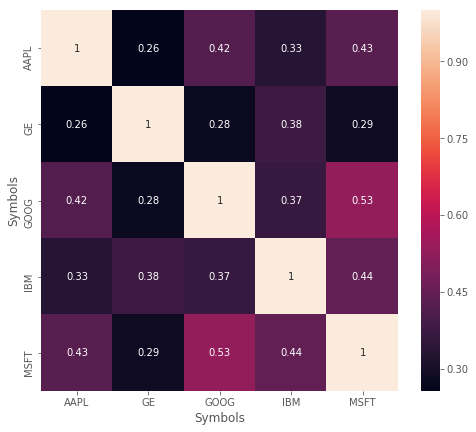

In [6]:
import seaborn as sns
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
print(corr)
sns.heatmap(corr, annot=True)

Let us further improve our analysis by plotting the pairplot to visualize possible correlations among competing stocks. It helps generate estimations of the overall distributions.

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


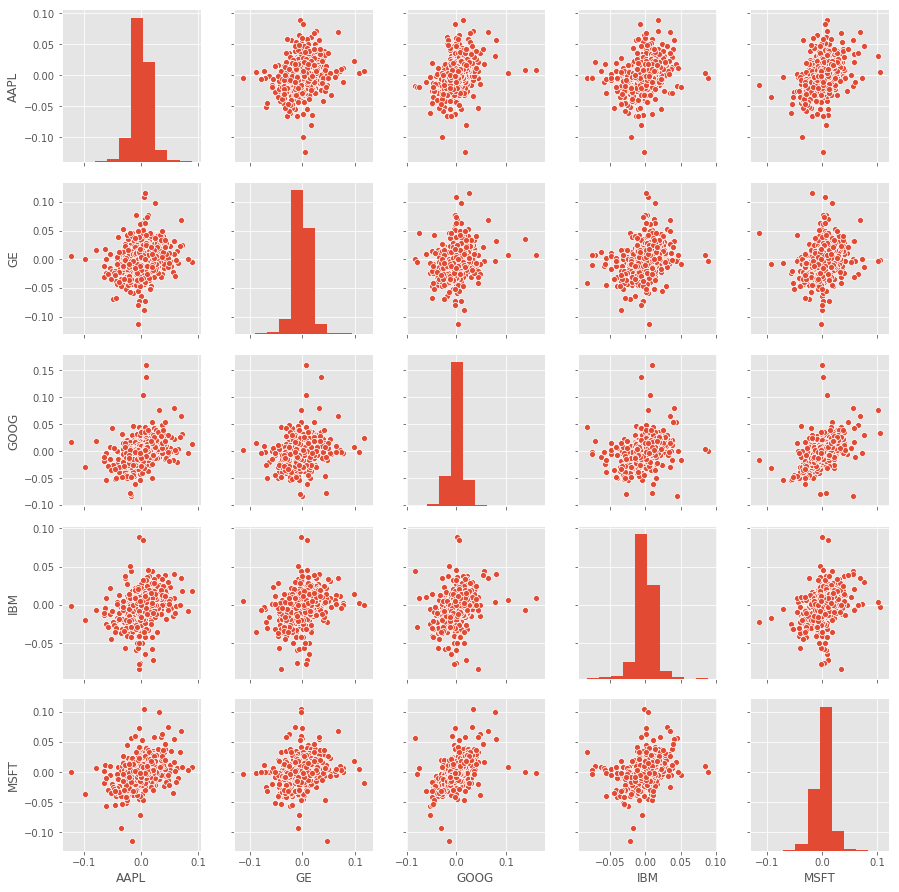

In [7]:
sns.pairplot(retscomp);

From here we could see most of the distributions among stocks which approximately positive correlations.
To prove the positive correlations, we will use heat maps to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

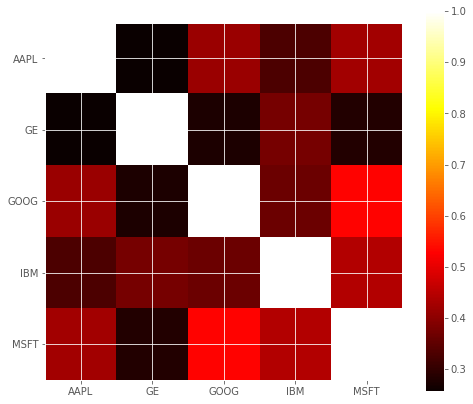

In [8]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the Scatter Matrix and Heatmap, we can find great correlations among the competing stocks. However, this might not show causality, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

## Stocks Returns Rate and Risk
Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

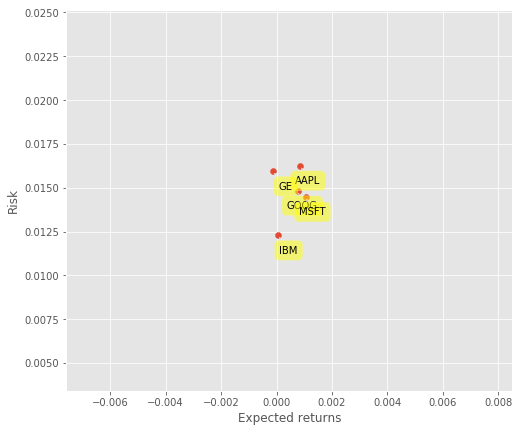

In [9]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Now you could view this neat chart of risk and return comparisons for competing stocks. Logically, you would like to minimize the risk and maximize returns. 

## Predicting Stocks Price
## Feature Engineering
We will use these three machine learning models to predict our stocks: Simple Linear Analysis, Quadratic Discriminant Analysis (QDA), and K Nearest Neighbor (KNN). But first, let us engineer some features: High Low Percentage and Percentage Change.

In [10]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [11]:
dfreg = df[["Adj Close","Volume"]].copy()
dfreg['HL_PCT'] = (df['High'] - df['Low'])/df['Close'] * 100
dfreg['Change_PCT'] = (df['Close'] - df['Open'])/df['Open'] * 100
dfreg.head()

,Adj Close,Volume,HL_PCT,Change_PCT
Date,,,,
2012-01-03,51.269413,75555200.0,0.851105,0.446996
2012-01-04,51.544937,65005500.0,1.306119,0.839024
2012-01-05,52.117188,67817400.0,1.406598,0.742256
2012-01-06,52.662014,79573200.0,0.835698,0.626532
2012-01-09,52.578468,98506100.0,1.517562,-0.886015


## Pre-processing & Cross Validation
We will clean up and process the data using the following steps before putting them into the prediction models:
1. Drop missing value
2. Separating the label here, we want to predict the AdjClose
3. Scale the X so that everyone can have the same distribution for linear regression
4. Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
5. Separate label and identify it as y
6. Separation of training and testing of model by cross validation train test split

Please refer the preparation codes below.

In [12]:
import math
import numpy as np
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

## Model Generation — Where the prediction fun starts
But first, let’s insert the following imports for our Scikit-Learn:**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Simple Linear Analysis & Quadratic Discriminant Analysis
Simple Linear Analysis shows a linear relationship between two or more variables. When we draw this relationship within two variables, we get a straight line. Quadratic Discriminant Analysis would be similar to Simple Linear Analysis, except that the model allowed polynomial (e.g: x squared) and would produce curves.
Linear Regression predicts dependent variables (y) as the outputs given independent variables (x) as the inputs.

We will plug and play the existing Scikit-Learn library and train the model by selecting our X and y train sets. The code will be as following.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

## K Nearest Neighbor (KNN)
This KNN uses feature similarity to predict values of data points. This ensures that the new point assigned is similar to the points in the data set. To find out similarity, we will extract the points to release the minimum distance (e.g: Euclidean Distance).

In [15]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

## Evaluation
A simple quick and dirty way to evaluate is to use the score method in each trained model. The score method finds the mean accuracy of self.predict(X) with y of the test data set.

In [16]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [17]:
print("# results")
print('The linear regression confidence is {}'.format(confidencereg))
print('The quadratic regression 2 confidence is {}'.format(confidencepoly2))
print('The quadratic regression 3 confidence is {}'.format(confidencepoly3))
print('The KNN confidence is {}'.format(confidenceknn))

# results
The linear regression confidence is 0.9643945440000973
The quadratic regression 2 confidence is 0.9666357519317351
The quadratic regression 3 confidence is 0.9648511535178413
The KNN confidence is 0.9490394793564629


This shows an enormous accuracy score (>0.95) for most of the models. However this does not mean we can blindly place our stocks. There are still many issues to consider, especially with different companies that have different price trajectories over time.

For sanity testing, let us print some of the stocks forecast.


In [18]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([192.32926637, 196.42176665, 198.40557939, 202.91399319,
       201.41587359, 200.99397825, 208.16255629, 202.7323764 ,
       202.02019189, 206.66051869, 210.54727563, 210.47064741,
       212.88506156, 212.64847865, 202.15639994, 206.74683961,
       204.44754265, 206.12636588, 209.34909028, 209.08286224])

## Plotting the Prediction
Based on the forecast, we will visualize the plot with our existing historical data. This will help us visualize how the model fares to predict future stocks pricing.

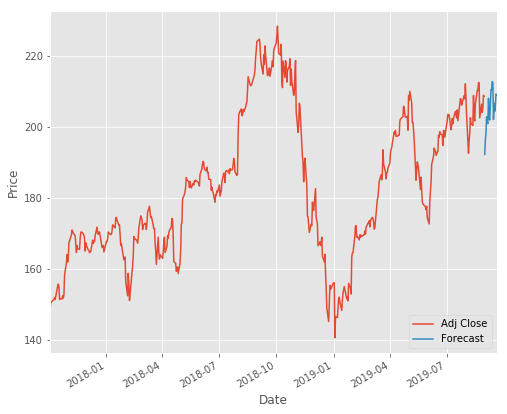

In [19]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

As we can see the blue color showcased the forecast on the stocks price based on regression. The forecast predicted that there would be a downturn for not too long, then it will recover. Therefore, we could buy the stocks during downturn and sell during upturn.

## Future Improvements/ Challenges

To further analyse the stocks, here are some ideas on how you could contribute. These ideas would be useful to get a more comprehensive analysis on stocks. Feel free to let me know should there be more clarifications needed.

1. Analyse economic qualitative factors such as news (news sourcing and sentimental analysis)
2. Analyse economic quantitative factors such as HPI of a certain country, economic inequality among origin of company